In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
%matplotlib inline

In [58]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

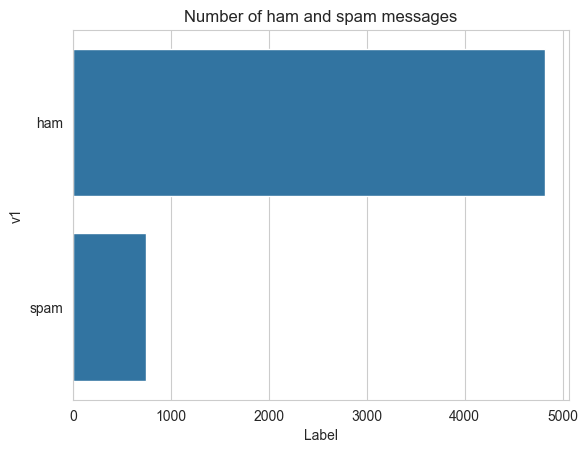

In [60]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [61]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [62]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [64]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [65]:
sequences[0]

[9, 22, 50, 59, 3, 67, 10, 2, 61]

In [66]:
for i in range(10):
    print(len(sequences[i]))

9
4
32
3
18
17
10
22
10
6


In [67]:
for i in range(10):
    print(len(sequences_matrix[i]))

150
150
150
150
150
150
150
150
150
150


In [68]:
sequences_matrix[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  9, 22, 50, 59,  3, 67, 10,  2, 61])

In [69]:
len(sequences_matrix[0])

150

In [70]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [71]:
def RNNmodel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [72]:
import tensorflow as tf

In [73]:
model = RNNmodel()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                10624     
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [74]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 2s 47ms/step - loss: 0.4228 - accuracy: 0.8466 - precision_1: 0.0854 - val_loss: 0.2890 - val_accuracy: 0.8969 - val_precision_1: 0.9773
Epoch 2/10
28/28 [==============================] - 1s 36ms/step - loss: 0.1793 - accuracy: 0.9431 - precision_1: 0.9929 - val_loss: 0.1152 - val_accuracy: 0.9697 - val_precision_1: 0.9573
Epoch 3/10
28/28 [==============================] - 1s 36ms/step - loss: 0.0882 - accuracy: 0.9801 - precision_1: 0.9744 - val_loss: 0.0668 - val_accuracy: 0.9809 - val_precision_1: 0.9398
Epoch 4/10
28/28 [==============================] - 1s 36ms/step - loss: 0.0540 - accuracy: 0.9874 - precision_1: 0.9801 - val_loss: 0.0568 - val_accuracy: 0.9832 - val_precision_1: 0.9474
Epoch 5/10
28/28 [==============================] - 1s 36ms/step - loss: 0.0404 - accuracy: 0.9905 - precision_1: 0.9806 - val_loss: 0.0598 - val_accuracy: 0.9843 - val_precision_1: 0.9839
Epoch 6/10
28/28 [==============================] - 1s 

In [75]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [76]:
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 0s 6ms/step - loss: 0.0534 - accuracy: 0.9839 - precision_1: 0.9328


In [77]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.053
  Accuracy: 0.984


In [78]:
predict = model.predict(test_sequences_matrix)

35/35 [==============================] - 0s 6ms/step


In [79]:
import numpy as np

In [80]:
predict

array([[4.0960396e-03],
       [1.9051213e-04],
       [5.8302735e-03],
       ...,
       [7.4136376e-05],
       [9.9412245e-01],
       [9.9950516e-01]], dtype=float32)

In [81]:
epsilon = 0.01
predictions = []
for pred in predict:
    if 1 - pred <= epsilon:
        predictions.append(1)
    else:
        predictions.append(0)

In [82]:
predictions

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [83]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap='gray_r',
                          linecolor='k'):

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                xticklabels=classes, yticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)
    
    plt.title('Confusion Matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

In [85]:
print(sklearn.metrics.classification_report(Y_test, predictions, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       981
        spam       0.99      0.83      0.90       134

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115


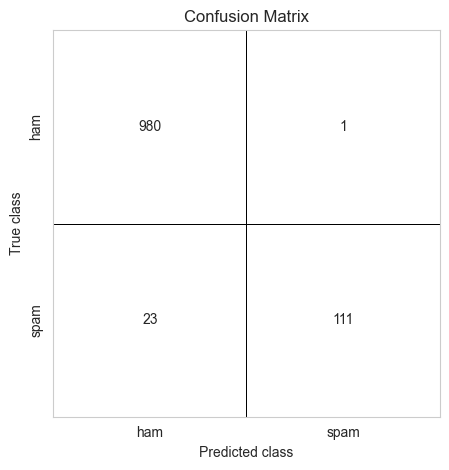

In [86]:
confusion_mtx = confusion_matrix(Y_test, predictions)
plot_confusion_matrix(confusion_mtx, classes=["ham", "spam"])